In [25]:
#importing libraries needed:
import numpy as np                     #linear algebar
import pandas as pa                     #data processing
import matplotlib.pyplot as plt
import seaborn as sns                   #provides graphics for statistical information 
import os

def annotplot(ax, w, h):                #function to add data to plot
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    for p in ax.patches:
        ax.annotate('{0:.1f}'.format(p.get_height()),+w , (p.get_height()+h))

In [2]:
matches_data = pa.read_csv("C:/Users/Reetinder/Desktop/Python/matches.csv")
matches_data.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
#understanding the dataset:
#number of rows and columns of the dataframe
matches_data.shape

(636, 18)

In [4]:
matches_data.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [5]:
matches_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

In [6]:
matches_data.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3
count,636.000000,636.000000,636.000000,636.000000,636.000000,0.0
mean,318.500000,2012.490566,0.025157,13.682390,3.372642,NaN
std,183.741666,2.773026,0.156726,23.908877,3.420338,NaN
min,1.000000,2008.000000,0.000000,0.000000,0.000000,NaN
25%,159.750000,2010.000000,0.000000,0.000000,0.000000,NaN
50%,318.500000,2012.000000,0.000000,0.000000,4.000000,NaN
75%,477.250000,2015.000000,0.000000,20.000000,7.000000,NaN
max,636.000000,2017.000000,1.000000,146.000000,10.000000,NaN


In [7]:
matches_data.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

#from the above output, we realise we have city and umpire 3 columns have maximum null alues.Preprocessing of both these columns is needed



In [8]:
#Preprocessing of data:
#drop umpire 3 column data from the data frame
matches_data.drop(['umpire3'], axis=1, inplace= True)

In [9]:
matches_data.columns.unique()

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2'],
      dtype='object')

In [11]:
#Replacing Supergiant with Supergiants as they are the same
matches_data.replace("Rising Pune Supergiant","Rising Pune Supergiants", inplace= True)
matches_data.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi


In [13]:
#replacing city with Venue columns
matches_data["city"].fillna( matches_data["venue"].apply(lambda x:x[:5]), inplace= True)

In [15]:
#finding matches with no result 
matches_data[matches_data["winner"].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan


In [19]:
#replace Bangalore in Bangaluru in city column
matches_data.replace("Bangalore","Bangaluru", inplace=True)
matches_data["city"].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangaluru', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah',
       'Dubai'], dtype=object)

In [21]:
#displaying team names
matches_data["team1"].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors'], dtype=object)

In [22]:
matches_data["season"].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
      dtype=int64)

Text(0, 0.5, 'No. of matches')

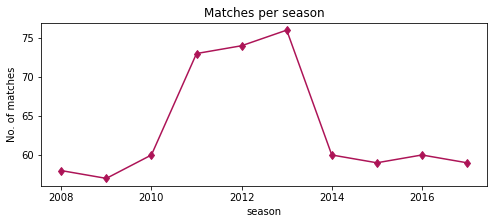

In [29]:
#number of matches per season
fig= plt.figure()
ax= fig.add_subplot(111)
ax= matches_data.groupby("season")["id"].count().plot(kind="line",title="Matches per season",
    marker="d",color= "#AD1457", figsize=(8,3))
plt.ylabel("No. of matches")

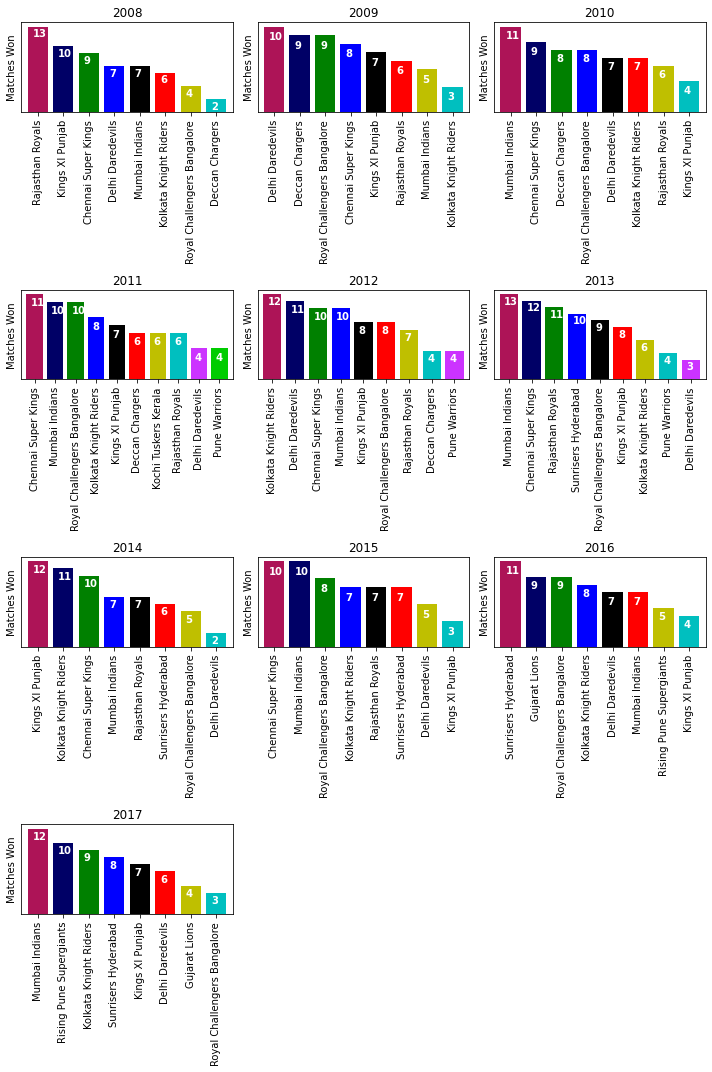

In [57]:
#no of matches won by each team each season
max_times_winner = matches_data.groupby('season')['winner'].value_counts()
max_times_winner
count=1
fig = plt.figure()

groups=max_times_winner.groupby('season')
for year,group in groups:
    ax = fig.add_subplot(4,3,count)
    ax.set_title(year)
    ax=group[year].plot(kind="bar",figsize=(10,15),width=0.8,color=["#AD1457","#000066", 'g', 'b', 'k', 'r', 'y','c','#cc33ff',"#00cc00"])
    count=count+1
    plt.xlabel('')
    plt.yticks([])
    plt.ylabel('Matches Won')
    
    totals = []
    for i in ax.patches:
        totals.append(i.get_height())
    total = sum(totals)
    for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
        ax.text(i.get_x()+0.2, i.get_height()-1.5,s= i.get_height(),color="white",fontweight='bold')
plt.tight_layout()
plt.show()

In [61]:
#total matches played by each team
matches_played = matches_data['team1'].value_counts()+ matches_data['team2'].value_counts()
matches_played

Chennai Super Kings            131
Deccan Chargers                 75
Delhi Daredevils               147
Gujarat Lions                   30
Kings XI Punjab                148
Kochi Tuskers Kerala            14
Kolkata Knight Riders          148
Mumbai Indians                 157
Pune Warriors                   46
Rajasthan Royals               118
Rising Pune Supergiants         30
Royal Challengers Bangalore    152
Sunrisers Hyderabad             76
dtype: int64

In [64]:
#matches won by each team
matches_won = matches_data.groupby('winner').count()
matches_won["id"]

winner
Chennai Super Kings            79
Deccan Chargers                29
Delhi Daredevils               62
Gujarat Lions                  13
Kings XI Punjab                70
Kochi Tuskers Kerala            6
Kolkata Knight Riders          77
Mumbai Indians                 92
Pune Warriors                  12
Rajasthan Royals               63
Rising Pune Supergiants        15
Royal Challengers Bangalore    73
Sunrisers Hyderabad            42
Name: id, dtype: int64

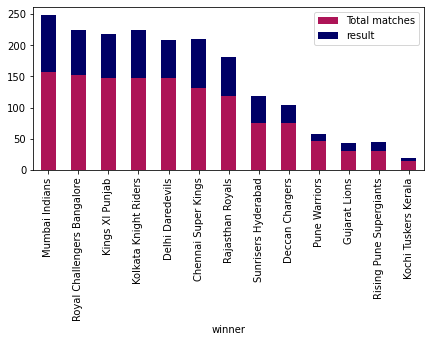

In [69]:
#Comparison between Number of matches won by each team and total matches played
matches_won = matches_data.groupby('winner').count()
matches_won

total_matches = matches_data['team1'].value_counts()+ matches_data['team2'].value_counts()
total_matches

matches_won['Total matches']=total_matches
matches_won[["Total matches","result"]].sort_values(by=["Total matches"],ascending=False).plot.bar(stacked=True,figsize=(7,3),color=["#AD1457","#000066"])

In [75]:
def annot_plot(ax,w,h):                      # function to add data to plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
        ax.annotate('{0:.1f}'.format(p.get_height()), (p.get_x()+w, p.get_height()+h))

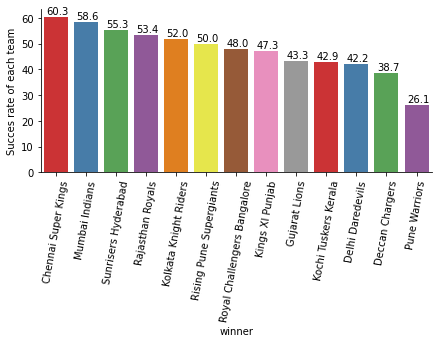

In [77]:
#success rate of each team
match_succes_rate = (matches_won["id"]/total_matches)*100
#print(match_succes_rate)

data = match_succes_rate.sort_values(ascending = False)
plt.figure(figsize=(7,3))
ax = sns.barplot(x = data.index, y = data, palette="Set1")
plt.ylabel('Succes rate of each team')
plt.xticks(rotation=80)
annot_plot(ax,0.08,1)

In [78]:
#Each Season Winner
season_winner = matches_data.groupby('season')['season','winner'].tail(1)
season_winner.sort_values(by="season",ascending=True)

<ipython-input-78-ff86928bf892>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  season_winner = matches_data.groupby('season')['season','winner'].tail(1)


,season,winner
116,2008,Rajasthan Royals
173,2009,Deccan Chargers
233,2010,Chennai Super Kings
306,2011,Chennai Super Kings
380,2012,Kolkata Knight Riders
456,2013,Mumbai Indians
516,2014,Kolkata Knight Riders
575,2015,Mumbai Indians
635,2016,Sunrisers Hyderabad
58,2017,Mumbai Indians


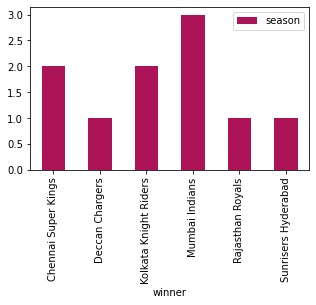

In [81]:
#team won maximum season
season_winner.groupby('winner').count().plot.bar(figsize=(5,3), color="#AD1457")

In [82]:
#Teams won by maximum runs
maximum_runs = matches_data.sort_values('win_by_runs', ascending = False)[:5].head(5)
maximum_runs[['season','winner','win_by_runs']]

,season,winner,win_by_runs
43,2017,Mumbai Indians,146
619,2016,Royal Challengers Bangalore,144
59,2008,Kolkata Knight Riders,140
556,2015,Royal Challengers Bangalore,138
410,2013,Royal Challengers Bangalore,130


In [83]:
#Team won by marginal runs
min_runs = matches_data[matches_data['win_by_runs'] == 1]
min_runs['winner'].value_counts()

Kings XI Punjab                2
Mumbai Indians                 2
Gujarat Lions                  1
Chennai Super Kings            1
Royal Challengers Bangalore    1
Delhi Daredevils               1
Name: winner, dtype: int64

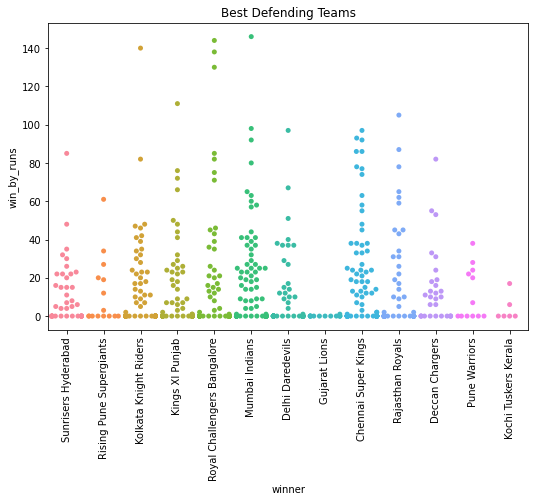

In [86]:
#Best Defending Teams
plt.figure(figsize=(8,5))

sns.swarmplot(y='win_by_runs',x='winner',data=matches_data)
plt.tight_layout()
plt.xticks(rotation=90)
plt.title('Best Defending Teams')
plt.show()

In [87]:
#Team won by maximum wickets
max_wickets=matches_data[matches_data['win_by_wickets']==10]
max_wickets['winner'].value_counts()

Royal Challengers Bangalore    2
Sunrisers Hyderabad            1
Kolkata Knight Riders          1
Mumbai Indians                 1
Deccan Chargers                1
Kings XI Punjab                1
Chennai Super Kings            1
Rajasthan Royals               1
Delhi Daredevils               1
Name: winner, dtype: int64

In [88]:
#Team won by minimum wickets
matches_data[['season','winner','win_by_wickets']][matches_data['win_by_wickets'] ==1]

,season,winner,win_by_wickets
559,2015,Kolkata Knight Riders,1


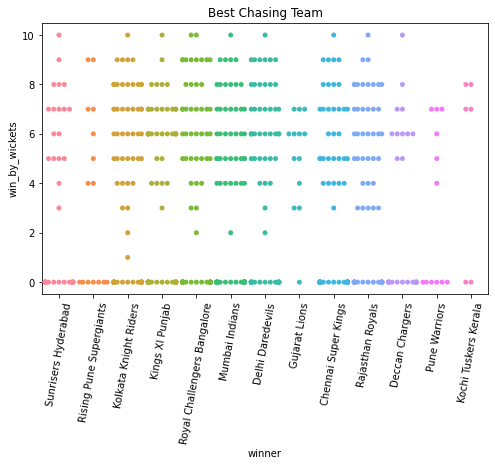

In [89]:
#best chasing team
plt.figure(figsize=(8,5))
sns.swarmplot(y='win_by_wickets',x='winner',data=matches_data)
plt.xticks(rotation=80)
plt.title('Best Chasing Team')
plt.show()

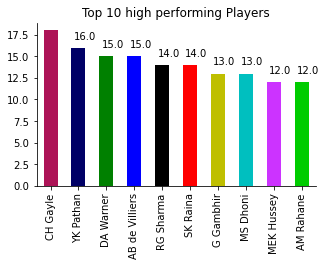

In [91]:
#Top 10 high performing Players
plt.figure(figsize=(5,3))

ax =matches_data['player_of_match'].value_counts()[:10].plot.bar(color=["#AD1457","#000066", 'g', 'b', 'k', 'r', 'y','c','#cc33ff',"#00cc00"])
plt.title('Top 10 high performing Players')
annot_plot(ax,0.08,1)

Text(0.5, 1.0, 'Toss winning success rate of each team')

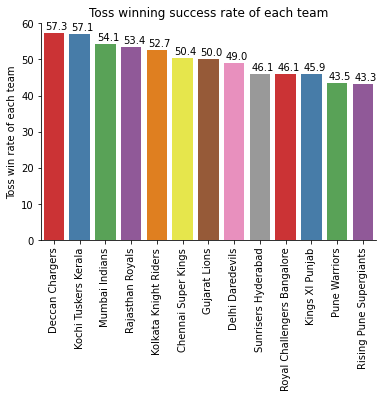

In [96]:
#Toss winning success rate of each team
toss_won = matches_data['toss_winner'].value_counts()
toss_win_rate = (toss_won/matches_played)*100
data = toss_win_rate.sort_values(ascending = False)
plt.figure(figsize=(6,4))
ax = sns.barplot(x = data.index, y = data, palette="Set1");
plt.ylabel('Toss win rate of each team')
plt.xticks(rotation=90)
annot_plot(ax,0.08,1)
plt.title('Toss winning success rate of each team')

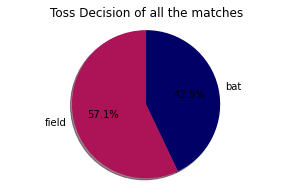

In [98]:
#Toss Decision across matches
toss=matches_data['toss_decision'].value_counts()
labels=np.array(toss.index)
sizes = toss.values
colors = ["#AD1457","#000066"]

# Plot
plt.figure(figsize=(5,3))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)

plt.title('Toss Decision of all the matches')
plt.axis('equal')
plt.show()

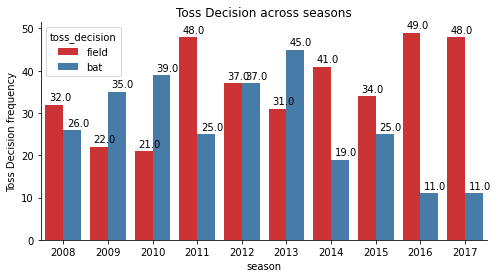

In [110]:
#Toss Decision across seasons
plt.figure(figsize=(8,4))
ax =sns.countplot(x='season',hue='toss_decision',data=matches_data,palette="Set1")
plt.ylabel('Toss Decision frequency')
plt.title('Toss Decision across seasons')
annot_plot(ax,0.08,1)

Text(0.5, 1.0, 'Toss decision by each team')

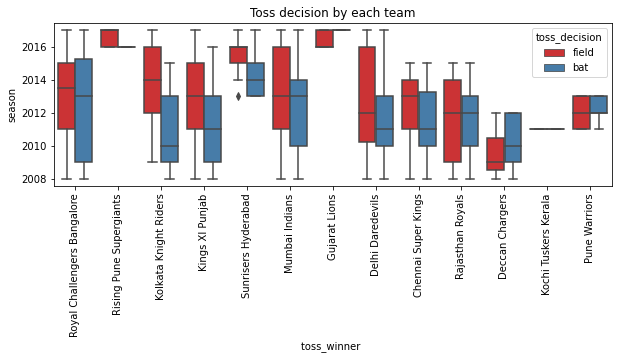

In [117]:
#How does Toss decision varied Season wise by each team ?
plt.figure(figsize=(10,3))
sns.boxplot(x="toss_winner", y="season", hue = 'toss_decision', data=matches_data, palette="Set1")
plt.xlabel('toss_winner ')
plt.xticks(rotation=90)
plt.title('Toss decision by each team')

In [118]:
#How toss winning affects the match winner
tosswin_win = matches_data['id'][matches_data['toss_winner'] == matches_data['winner']].count()
total_matches=matches_data['id'].count()
Success_rate = ((matches_data[matches_data['toss_winner'] == matches_data['winner']].count())/(total_matches))*100

print("Number of matches in which Toss winner is the game winner is :",tosswin_win, "out of",total_matches," ie.,", Success_rate["id"],"%" )

Number of matches in which Toss winner is the game winner is : 325 out of 636  ie., 51.100628930817614 %


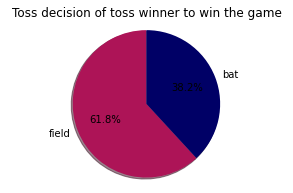

In [119]:
#Toss Decision in which Toss winner is the game winner
tosswin_winner = matches_data['toss_decision'][matches_data['toss_winner'] == matches_data['winner']].value_counts()
labels=np.array(tosswin_winner.index)
sizes = tosswin_winner.values
colors =["#AD1457","#000066"]

plt.figure(figsize=(5,3))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)

plt.title('Toss decision of toss winner to win the game')
plt.axis('equal')
plt.show()

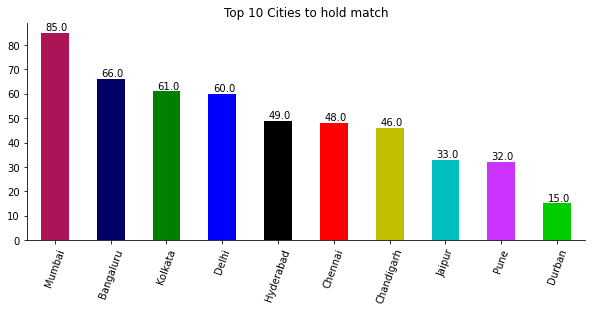

In [122]:
#Top 10 Cities to hold match
plt.figure(figsize=(10,4))

ax=matches_data['city'].value_counts()[:10].plot.bar(color=["#AD1457","#000066", 'g', 'b', 'k', 'r', 'y','c','#cc33ff',"#00cc00"])
plt.title('Top 10 Cities to hold match')
plt.xticks(rotation=70)
annot_plot(ax,0.08,1)

In [123]:
#In which city does each team has won the most matches
a=matches_data.groupby(['winner','city']).size().reset_index(name='win_counts')
a=a.sort_values("win_counts",ascending=False)
a.groupby("winner").head(1)

,winner,city,win_counts
125,Mumbai Indians,Mumbai,45
107,Kolkata Knight Riders,Kolkata,37
4,Chennai Super Kings,Chennai,33
162,Royal Challengers Bangalore,Bangaluru,30
147,Rajasthan Royals,Jaipur,24
43,Delhi Daredevils,Delhi,23
74,Kings XI Punjab,Chandigarh,22
186,Sunrisers Hyderabad,Hyderabad,20
159,Rising Pune Supergiants,Pune,5
135,Pune Warriors,Pune,4


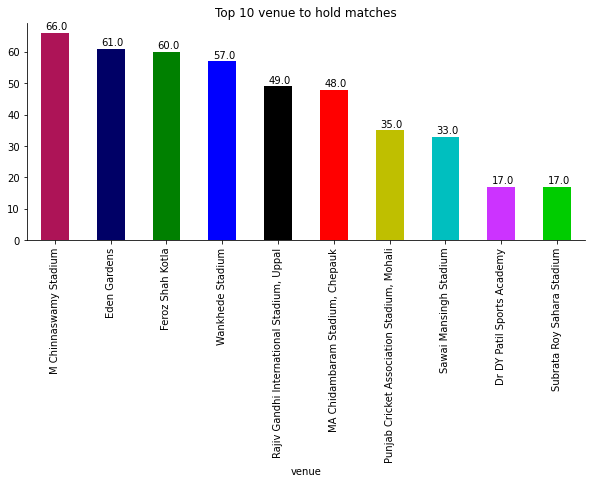

In [126]:
#top 10 venue to hold max number of matches
plt.figure(figsize=(8,4))
venue=matches_data.groupby('venue')["id"].count()
ax =venue.sort_values(ascending=False).head(10).plot.bar(figsize=(10,4),color=["#AD1457","#000066", 'g', 'b', 'k', 'r', 'y','c','#cc33ff',"#00cc00"])
plt.title('Top 10 venue to hold matches')
plt.xticks(rotation=90)
annot_plot(ax,0.08,1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 <a list of 35 Text major ticklabel objects>)

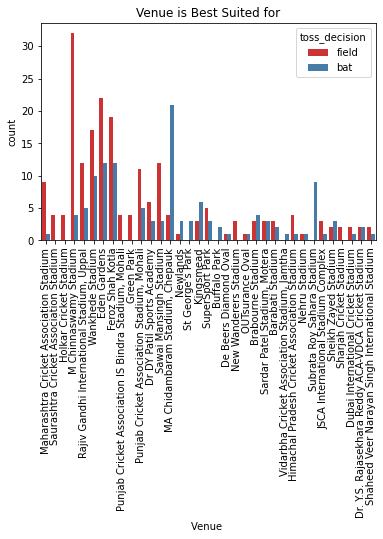

In [129]:
#Identify if each Venue is Best Suited to opt for batting or fielding based on previous matches won on that venue
venue_suit_for =matches_data[matches_data['toss_winner'] == matches_data['winner']]
sns.countplot(x='venue',hue='toss_decision',data=venue_suit_for,  palette="Set1")
plt.xlabel('Venue ')
plt.title('Venue is Best Suited for')
plt.xticks(rotation=90)

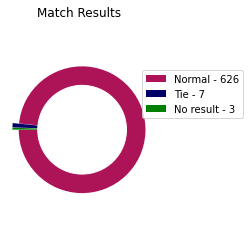

In [131]:
#Match Results : Normal , tie and no result
result=matches_data['result'].value_counts().tolist()
names='Normal - '+str(result[0]), 'Tie - '+str(result[1]), 'No result - '+str(result[2]), 

fig, ax = plt.subplots(figsize=(3.5,3.5))  
# Create a pieplot
explode = (0, 0.01, 0.01)
ax1,text=ax.pie(result,labeldistance=2,explode=explode,radius=0.1, startangle=180,colors=["#AD1457","#000066", 'g'])
#plt.show()
ax.axis('equal')
ax.set_title("Match Results") 

# add a circle at the center
my_circle=plt.Circle( (0,0), 0.07, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.legend(ax1, names,  bbox_to_anchor=(.9,.8), loc=2)
plt.tight_layout()
plt.show()

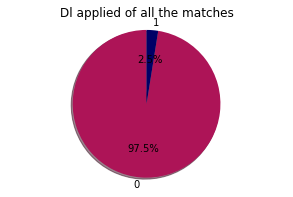

In [132]:
#Cities with maximum DL Applied
toss=matches_data['dl_applied'].value_counts()
labels=np.array(toss.index)
sizes = toss.values
colors = ["#AD1457","#000066"]

# Plot
plt.figure(figsize=(5,3))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)

plt.title('Dl applied of all the matches')
plt.axis('equal')
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

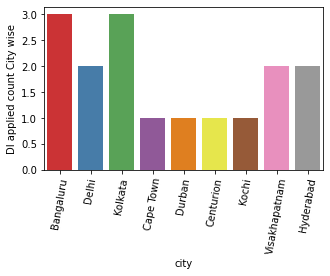

In [134]:
plt.figure(figsize=(5,3))
ax=sns.countplot(matches_data.city[matches_data.dl_applied==1],palette="Set1")
plt.ylabel('Dl applied count City wise')
plt.xticks(rotation=80)